# Download Dataset

In [1]:
!pip install -q kaggle
import os
import zipfile

In [2]:
import shutil


kaggle_json_path = 'kaggle.json'
kaggle_dir = os.path.expanduser('~/.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)
shutil.copy(kaggle_json_path, kaggle_dir)
print("File 'kaggle.json' berhasil disalin ke:", kaggle_dir)

File 'kaggle.json' berhasil disalin ke: /root/.kaggle


In [3]:
!kaggle datasets download -d ezziomonk/apple-revised

Dataset URL: https://www.kaggle.com/datasets/ezziomonk/apple-revised
License(s): unknown
 96% 130M/135M [00:03<00:00, 51.0MB/s]
100% 135M/135M [00:03<00:00, 43.2MB/s]


# Extract Zip File

In [4]:
# Ekstraksi dataset
local_zip = 'apple-revised.zip'
dataset_dir = '/content/data'

with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("Dataset berhasil diekstraksi ke:", dataset_dir)

Dataset berhasil diekstraksi ke: /content/data


In [5]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.1


# Import Library

In [6]:
!pip install tensorflow==2.13.0 keras==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
      

In [1]:
!pip show tensorflow keras

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
---
Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import matplotlib.image as img
import zipfile
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from glob import glob

# Check Dataset

In [3]:
data_dir = pathlib.Path('/content/data/apple')
class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])
print("Data yang tersedia:", class_names)

Data yang tersedia: ['Test', 'Train', 'Val']


In [4]:
base_path = '/content/data/apple'

print("== Jumlah Data per Split dan Kelas ==")
grand_total = 0

for split_name in os.listdir(base_path):
    split_path = os.path.join(base_path, split_name)
    if not os.path.isdir(split_path):
        continue

    print(f"\n== Data untuk {split_name.upper()} ==")
    total_files_in_split = 0

    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if not os.path.isdir(class_path):
            continue

        files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        num_files = len(files)
        total_files_in_split += num_files

        print(f"  - {class_name}: {num_files} files")

    print(f"Total files in {split_name.upper()}: {total_files_in_split}")
    grand_total += total_files_in_split

print(f"\n Total semua data: {grand_total} files")

== Jumlah Data per Split dan Kelas ==

== Data untuk TRAIN ==
  - Black Rot: 1635 files
  - Cedar Apple Rust: 1376 files
  - Apple Scab: 1584 files
  - Healthy: 1544 files
Total files in TRAIN: 6139

== Data untuk TEST ==
  - Black Rot: 402 files
  - Cedar Apple Rust: 428 files
  - Apple Scab: 483 files
  - Healthy: 515 files
Total files in TEST: 1828

== Data untuk VAL ==
  - Black Rot: 447 files
  - Cedar Apple Rust: 396 files
  - Apple Scab: 453 files
  - Healthy: 451 files
Total files in VAL: 1747

 Total semua data: 9714 files


# Data Augmentation

In [5]:
path = "/content/data/apple"

def augment_images(input_folder, output_folder, augmentation_times=2):
    os.makedirs(output_folder, exist_ok=True)

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            output_class_folder = os.path.join(output_folder, class_name)
            os.makedirs(output_class_folder, exist_ok=True)
            image_paths = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

            for img_path in image_paths:
                img = image.load_img(img_path)
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)

                i = 0
                for batch in datagen.flow(x, save_to_dir=output_class_folder, save_prefix='aug', save_format='jpeg'):
                    i += 1
                    if i >= augmentation_times:
                        break

output_train_folder = "/content/data/aug_train"
output_val_folder = "/content/data/aug_val"

augment_images(os.path.join(path, 'Train'), output_train_folder, augmentation_times=4)
augment_images(os.path.join(path, 'Val'), output_val_folder, augmentation_times=4)

print("Data augmentation selesai.")

Data augmentation selesai.


In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    output_train_folder,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

val_generator = val_datagen.flow_from_directory(
    output_val_folder,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    './data/apple/Test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'
)

Found 18436 images belonging to 4 classes.
Found 6429 images belonging to 4 classes.
Found 1828 images belonging to 4 classes.


In [7]:
def count_images_in_folder(folder_path):
    image_count = len(list(pathlib.Path(folder_path).glob('**/*.jpg'))) + \
                  len(list(pathlib.Path(folder_path).glob('**/*.jpeg'))) + \
                  len(list(pathlib.Path(folder_path).glob('**/*.png')))
    return image_count

output_train_folder = "/content/data/aug_train"
output_val_folder = "/content/data/aug_val"

train_image_count = count_images_in_folder(output_train_folder)
val_image_count = count_images_in_folder(output_val_folder)

total_image_count = train_image_count + val_image_count

print(f"Total images in Train folder: {train_image_count}")
print(f"Total images in Validation folder: {val_image_count}")
print(f"Total images in both folders: {total_image_count}")

Total images in Train folder: 18436
Total images in Validation folder: 6429
Total images in both folders: 24865


# Plot Dataset

Gambar dari Dataset Training:


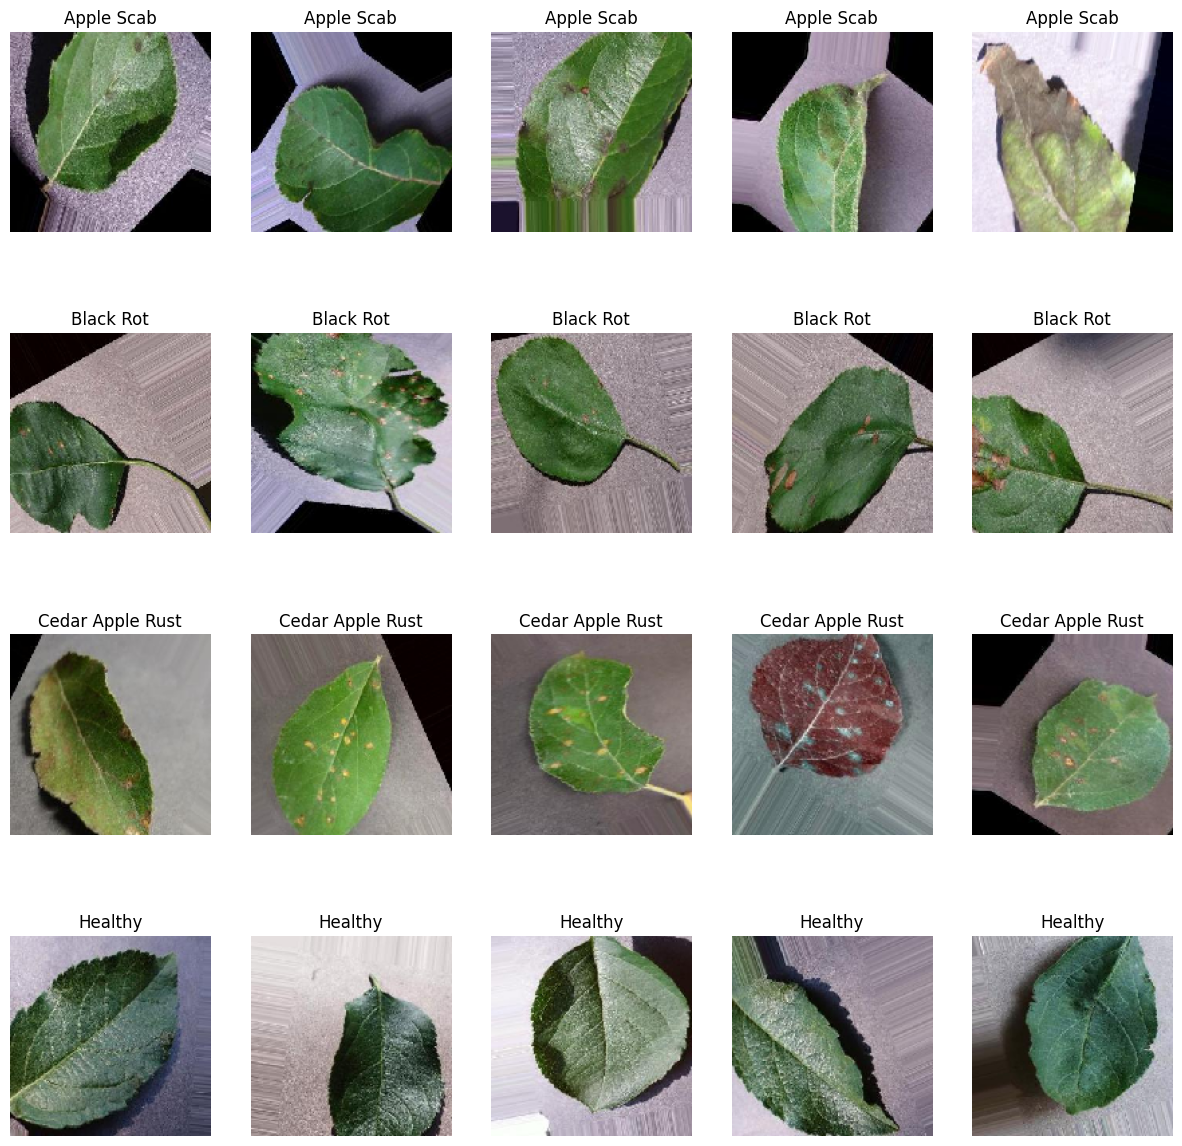

Gambar dari Dataset Validation:


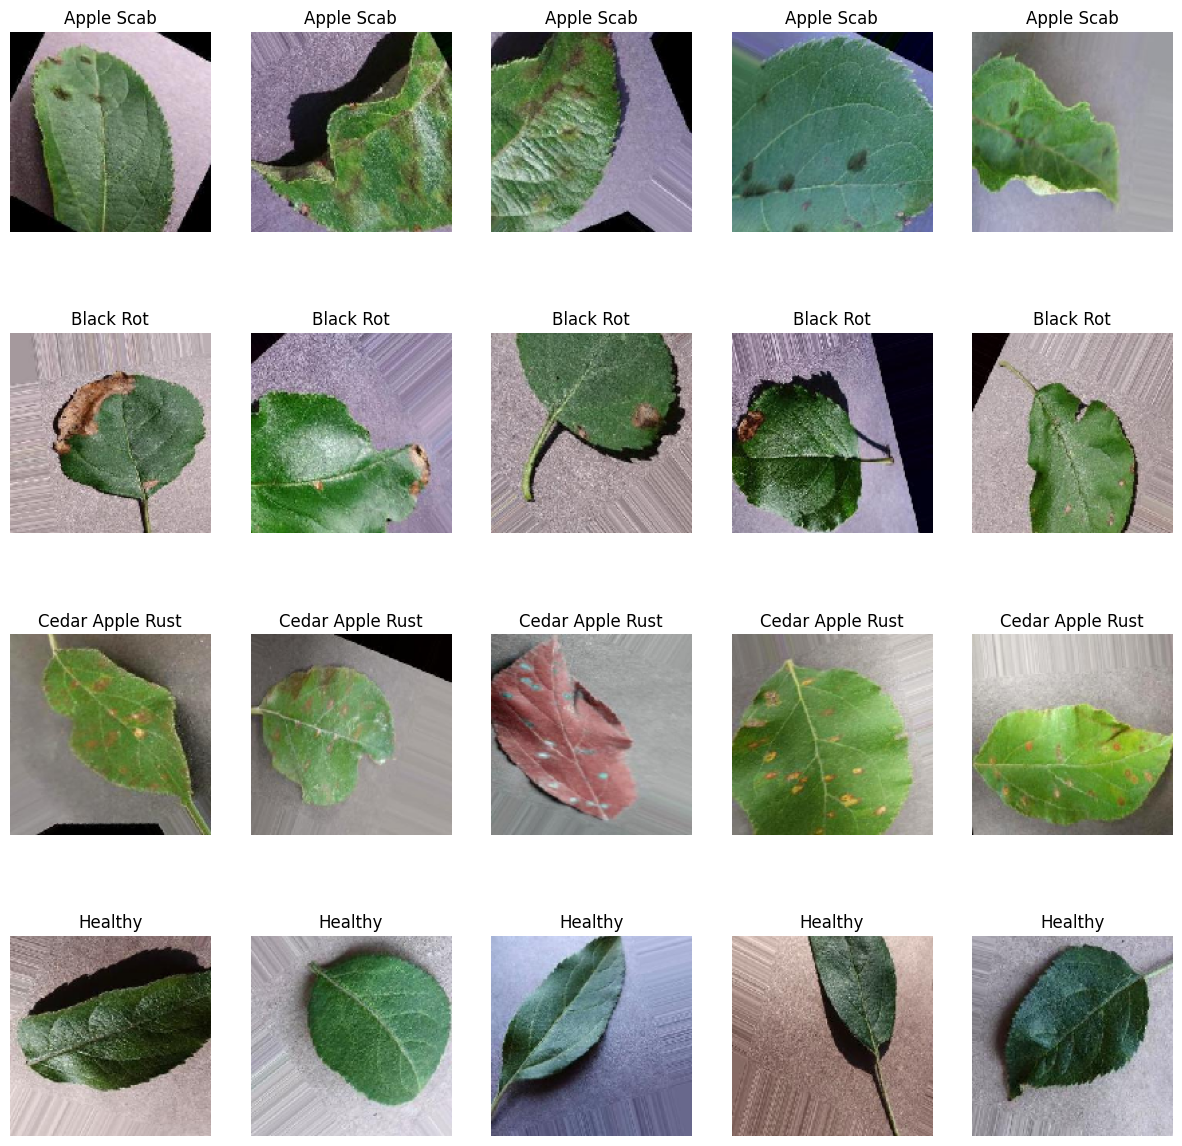

In [8]:
def plot_images_by_class(folder_path, class_names, num_images_per_class=5):
    plt.figure(figsize=(15, 15))

    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        image_paths = [str(img_path) for img_path in pathlib.Path(class_folder).glob('*.jpeg')]

        selected_images = random.sample(image_paths, num_images_per_class)

        for i, img_path in enumerate(selected_images):
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            plt.subplot(len(class_names), num_images_per_class, class_names.index(class_name)*num_images_per_class + i + 1)
            plt.imshow(img_array.astype("uint8"))
            plt.axis("off")
            plt.title(class_name)

    plt.show()

output_train_folder = "/content/data/aug_train"
output_val_folder = "/content/data/aug_val"

class_names = ['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

print("Gambar dari Dataset Training:")
plot_images_by_class(output_train_folder, class_names, num_images_per_class=5)

print("Gambar dari Dataset Validation:")
plot_images_by_class(output_val_folder, class_names, num_images_per_class=5)

# Parameter

In [9]:
IMG_SIZE = (256, 256)
IMG_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)

# Architecture Model

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.InputLayer(batch_input_shape=(None, *IMG_SHAPE)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.35),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.35),

    layers.Dense(4, activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

# Callbacks

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.91:
            print("\nAkurasi validasi sudah mencapai 91%, menghentikan pelatihan!")
            self.model.stop_training = True

Callbacks = [
    myCallback(),
    EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [13]:
BATCH_SIZE = 32

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator) // BATCH_SIZE,
    callbacks=Callbacks
)

Epoch 1/10
577/577 [==============================] - 4362s 8s/step - loss: 0.5192 - accuracy: 0.8290 - val_loss: 0.4789 - val_accuracy: 0.8229
Epoch 2/10
577/577 [==============================] - ETA: 0s - loss: 0.2215 - accuracy: 0.9232
Akurasi validasi sudah mencapai 91%, menghentikan pelatihan!
577/577 [==============================] - 4313s 7s/step - loss: 0.2215 - accuracy: 0.9232 - val_loss: 0.1695 - val_accuracy: 0.9323


# Plot Training & Validation

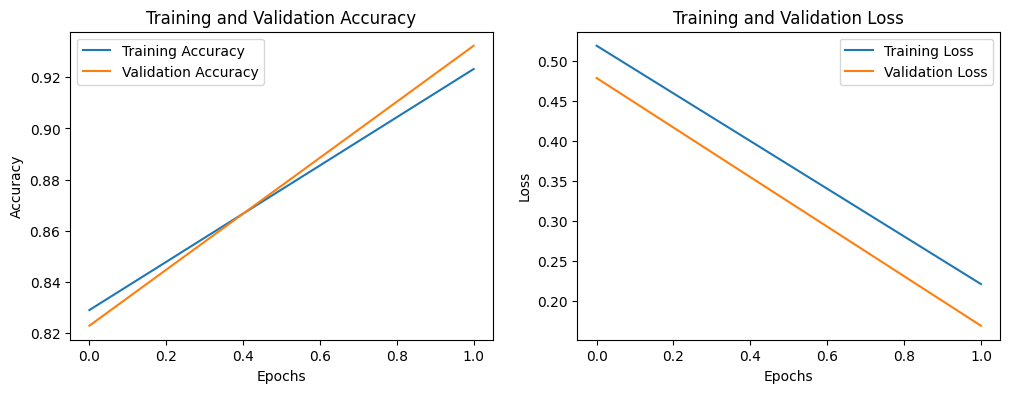

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Save Model

In [15]:
model.save('/content/model_cek_apel.keras')

In [16]:
model.save('/content/model_cek_apel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate Model

In [17]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

58/58 [==============================] - 126s 2s/step - loss: 0.6947 - accuracy: 0.8660
Test Loss: 0.6947019696235657
Test Accuracy: 0.8659737706184387


# Load & Test Model

In [18]:
print(test_generator.class_indices)
label = test_generator.class_indices

{'Apple Scab': 0, 'Black Rot': 1, 'Cedar Apple Rust': 2, 'Healthy': 3}


In [19]:
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

In [20]:
model = load_model('/content/model_cek_apel.h5')

In [35]:
uploaded = files.upload()

label = ['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

for fn in uploaded.keys():
    path = '/content/' + fn
    img = load_img(path, target_size=(256, 256))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    result = classes[0]
    for count, x in enumerate(result):
        print(f'{label[count]}: {(result[count] * 100)}% accuracy')

    predicted_label = np.argmax(result)
    max_label = np.max(result)

    if max_label > 0.6:
        print(f'\nYou Have a {label[predicted_label]} Apple With {result[predicted_label] * 100 }% confidency')
    else:
        print('\nUnable to confidently predict the apple type.')

    name = list(uploaded.keys())
    !rm '{name[0]}'

Saving cedar-apple-rust-foliage.png to cedar-apple-rust-foliage.png
1/1 [==============================] - 0s 72ms/step
Apple Scab: 0.0% accuracy
Black Rot: 0.0% accuracy
Cedar Apple Rust: 100.0% accuracy
Healthy: 0.0% accuracy

You Have a Cedar Apple Rust Apple With 100.0% confidency


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

# Deploy to TFLite

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_name = 'tf_lite_model_cek_apel.tflite'
with open(tflite_name, 'wb') as f:
    f.write(tflite_model)

print(f"Model berhasil disimpan sebagai {tflite_name}")

Model berhasil disimpan sebagai tf_lite_model_cek_apel.tflite
